In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

Conflict_data = pd.read_csv("/content/Africa_1997-2024_Aug23.csv")

print(Conflict_data.info())
print(Conflict_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381997 entries, 0 to 381996
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       381997 non-null  object 
 1   event_date          381997 non-null  object 
 2   year                381997 non-null  int64  
 3   time_precision      381997 non-null  int64  
 4   disorder_type       381997 non-null  object 
 5   event_type          381997 non-null  object 
 6   sub_event_type      381997 non-null  object 
 7   actor1              381997 non-null  object 
 8   assoc_actor_1       103469 non-null  object 
 9   inter1              381997 non-null  int64  
 10  actor2              277752 non-null  object 
 11  assoc_actor_2       76108 non-null   object 
 12  inter2              381997 non-null  int64  
 13  interaction         381997 non-null  int64  
 14  civilian_targeting  113619 non-null  object 
 15  iso                 381997 non-nul

In [7]:
Conflict_event_data = Conflict_data[["disorder_type", "actor1", "sub_event_type", "event_type"]]
print(Conflict_event_data.head())

        disorder_type                                             actor1  \
0  Political violence                                   Rioters (Angola)   
1  Political violence       JNIM: Group for Support of Islam and Muslims   
2  Political violence       JNIM: Group for Support of Islam and Muslims   
3  Political violence       JNIM: Group for Support of Islam and Muslims   
4  Political violence  Islamic State (West Africa) and/or Boko Haram ...   

  sub_event_type event_type  
0   Mob violence      Riots  
1    Armed clash    Battles  
2    Armed clash    Battles  
3    Armed clash    Battles  
4    Armed clash    Battles  


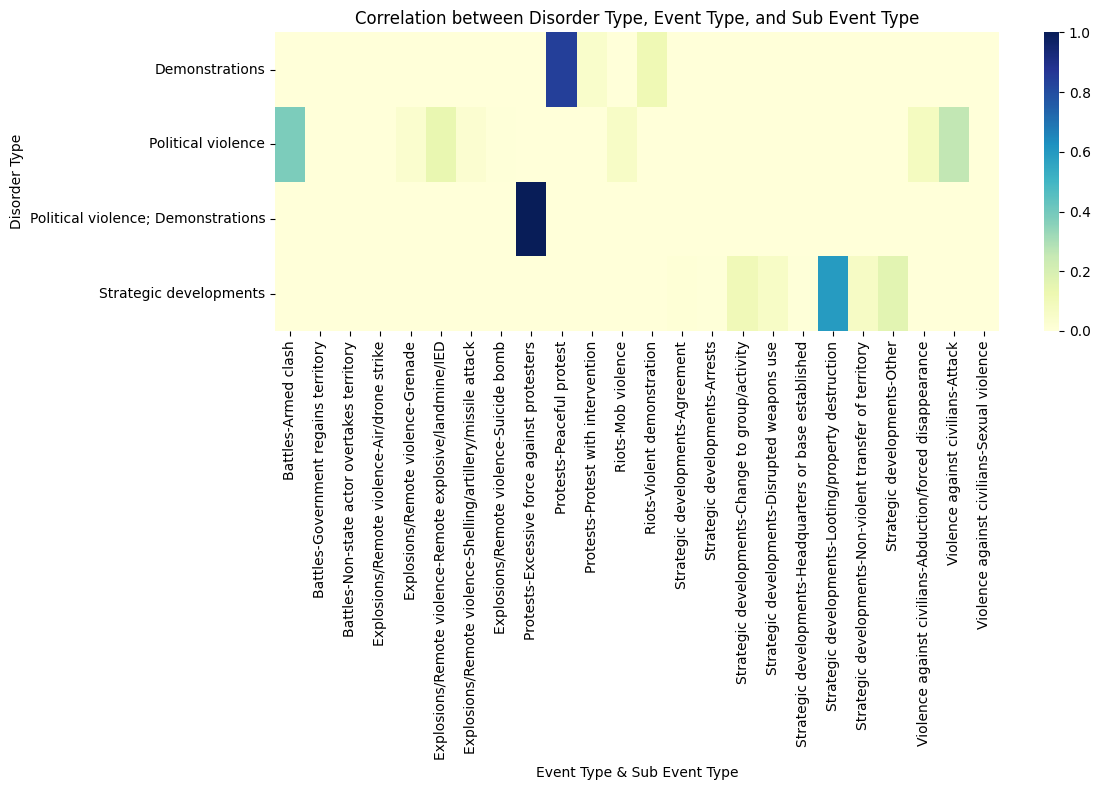

In [9]:
# Since 'actor1' may have many unique values, we will limit it to the top 10 most frequent actors for better visualization
top_actors = Conflict_event_data['actor1'].value_counts().index[:10]
Conflict_event_data_filtered = Conflict_event_data[Conflict_event_data['actor1'].isin(top_actors)]

# Create a correlation heatmap for categorical variables using frequency counts
cross_tab = pd.crosstab(Conflict_event_data_filtered['disorder_type'],
                        [Conflict_event_data_filtered['event_type'],
                         Conflict_event_data_filtered['sub_event_type']],
                        normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Correlation between Disorder Type, Event Type, and Sub Event Type")
plt.xlabel("Event Type & Sub Event Type")
plt.ylabel("Disorder Type")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()